# 数值稳定性+模型初始化和激活函数

神经网络的梯度
- 考虑如下有d层的神经网络
  
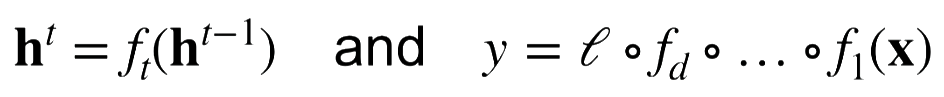

- 计算损失l关于参数wt的梯度
  
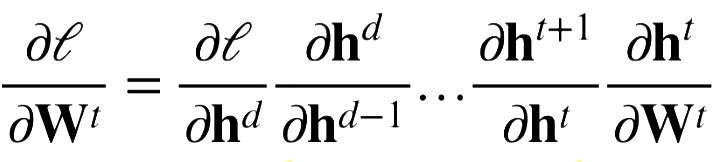

数值稳定性常见的两个问题
- 梯度爆炸
- 梯度消失


例子：MLP
- 加入如下MLP(省略了偏移)

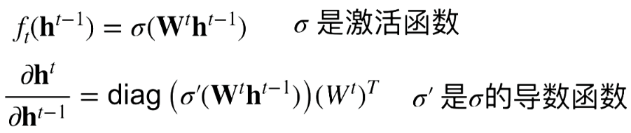

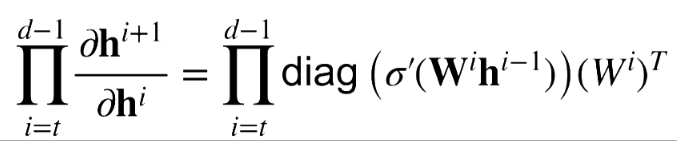

梯度爆炸
- 使用ReLU作为激活函数
  
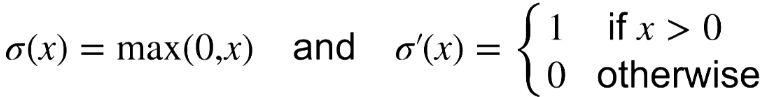

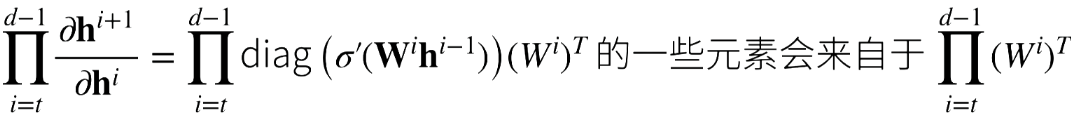

 - 如果d-t很大，值将会很大

梯度爆炸的问题
- 值超出值域(infinity)
  - 对于16位浮点数尤为严重(数值区间6e-5-6e4)
- 对学习率敏感
  - 如果学习率过大->大参数值->更大的梯度
  - 如果学习率太小->训练无进展
  - 我们可能需要在训练过程中不断调整学习率

梯度消失
- 使用sigmoid函数作为激活函数
  
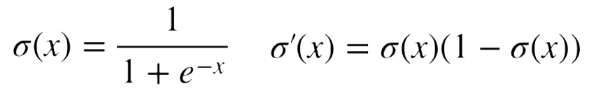

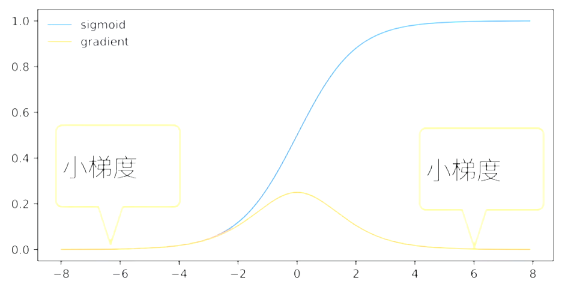

梯度消失的问题
- 梯度值变为0
  - 对16位浮点数尤为严重
- 训练没有进展
   - 不管如何选择学习率
- 对于底部曾尤为严重
  - 仅仅顶部曾训练的较好
  - 无法让神经网络更深

总结
- 当数值过大或过小时会导致数值问题
- 常发生在深度模型中，因为其会对n个数累乘

让训练更加稳定
- 目标：让梯度值在合理的范围内
  - 例如：[1e-6, 1e-3]
- 将乘法变加法
  - ResNet，LSTM
- 归一化
  - 梯度归一化，梯度裁剪(RNN)
- 合理的初始权重和激活函数

让每层的方差是一个常数
- 将每层的输出和梯度都看作随机变量
- 让它们的均值和方差都保持一致

权重初始化
- 在合理值去建立随机初始参数
- 训练开始的时候更容易有数值不稳定
  - 远离最优解的地方损失函数表面可能很复杂
  - 最优解附件表面会比较平
- 使用N(0. 0.01)来初始可能对小网络没问题，但不能保证深度神经网络 

In [2]:
#导入第三方库
%matplotlib  inline
from d2l import torch as d2l
import torch
from torch import nn

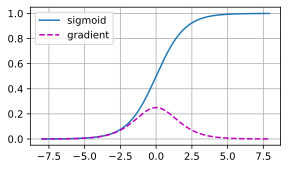

In [3]:
#梯度消失的代码实现
x = torch.arange(-8.0, 8.0, 0.1, requires_grad= True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()], 
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

In [4]:
#梯度爆炸的代码实现
M = torch.normal(0, 1, size=(4, 4))
print('一个矩阵\n', M)
for i in range(100):
    M = torch.mm(M, torch.normal(0, 1, size=(4,4)))

print('乘以100个矩阵后\n', M)

一个矩阵
 tensor([[-0.5968,  0.6443,  1.8338, -0.9597],
        [-1.3179,  1.3229,  1.4533, -0.4221],
        [ 1.3939,  2.4497, -1.3002,  0.4254],
        [-1.2644,  0.3710,  1.1184,  0.7063]])
乘以100个矩阵后
 tensor([[ 3.5190e+25, -4.4763e+24, -1.7259e+25, -5.0223e+25],
        [ 1.9334e+25, -2.4594e+24, -9.4824e+24, -2.7594e+25],
        [ 3.7437e+25, -4.7620e+24, -1.8361e+25, -5.3430e+25],
        [-2.2938e+25,  2.9178e+24,  1.1250e+25,  3.2737e+25]])


一般默认模型参数使用正态分布进行初始化，使用随机初始化时：推荐使用Xavier初始化